In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab
import mlflow

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler



from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier



In [15]:
csv_train = pd.read_csv('train_ver2.csv')

csv_train.columns

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7028\560558549.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_train = pd.read_csv('train_ver2.csv')


Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

<h1>ML Flow Stuff</h1>

In [16]:
expermient_name = 'clustering_test'

dict_values = {
    'mse':0,
    'r2':0,
    'rmse':0
}


def load_create_experiment():
    if mlflow.get_experiment_by_name(expermient_name):
        return mlflow.get_experiment_by_name(expermient_name)
    return mlflow.create_experiment(expermient_name)
    
current_experiment = load_create_experiment()
mlflow.set_experiment(expermient_name)

<Experiment: artifact_location='file:///C:/Users/Administrador/Desktop/DataMining/segundo_parcial/mlruns/3', creation_time=1671665749345, experiment_id='3', last_update_time=1671665749345, lifecycle_stage='active', name='clustering_test', tags={}>

Loggin Params

In [ ]:

#columns_to_drop = ['Model']
#mlflow.log_param('drop_columns',columns_to_drop) 1th Param name, value


Set Tags

In [ ]:
#mlflow.set_tag('Summary',summary)


Loggin Metrics

In [ ]:
#mlflow.log_metrics(dict_values)


Save Picture

In [ ]:
#plt.savefig('plotname.png')
#mlflow.log_artifact('plotname.png')
#plt.show()

<h2>Analisis Univariado</h2>

In [4]:
column_to_analize = 'renta'
mlflow.log_param('Column',column_to_analize)


'renta'

Bar plot

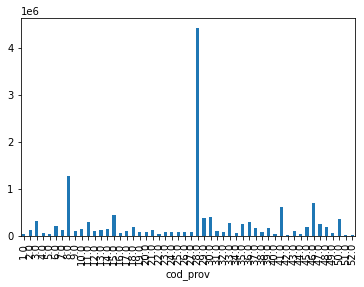

In [14]:
img_name = column_to_analize + '_bar_plot.png'
fig = csv_train.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Box Plot

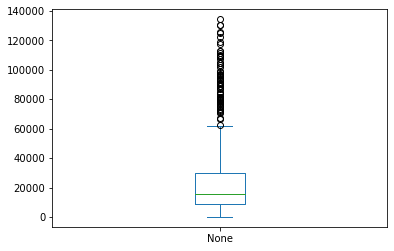

In [29]:
img_name = column_to_analize + '_box_plot.png'
fig = csv_train.groupby(column_to_analize).size().plot(kind='box').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Hist Plot


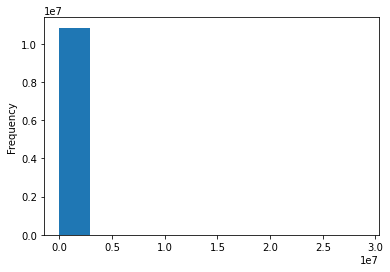

In [6]:
img_name = column_to_analize + '_hist_plot.png'
fig = csv_train[column_to_analize].plot(kind='hist').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Comment Column

In [31]:
comment ='Realizar analisis mas a fondo'
mlflow.set_tag('Comentario',comment)


<h2>Variables Dummies<h2>

In [26]:
column_dummy = 'segmento'
var_dummies = pd.get_dummies(csv_train[column_dummy])
csv_train = csv_train.drop(columns=[column_dummy])

csv_train[var_dummies.columns] = var_dummies

In [27]:
mlflow.set_tag('Var dummies',var_dummies.columns)
print(var_dummies.columns)


Index(['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'], dtype='object')


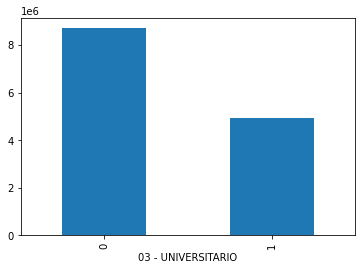

In [30]:
feature_dummy = '03 - UNIVERSITARIO'
img_name = column_dummy + '_' + feature_dummy + '_bar_plot.png'
fig = var_dummies.groupby(feature_dummy).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

End MlFlow Run

In [20]:
mlflow.end_run()

Describe DataSet

In [8]:
csv_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ncodpers,13647309.0,834904.211501,431565.025784,15889.00,452813.00,931893.0,1199286.00,1553689.00
ind_nuevo,13619575.0,0.059562,0.236673,0.00,0.00,0.0,0.00,1.00
indrel,13619575.0,1.178399,4.177469,1.00,1.00,1.0,1.00,99.00
tipodom,13619574.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00
cod_prov,13553718.0,26.571470,12.784017,1.00,15.00,28.0,35.00,52.00
ind_actividad_cliente,13619575.0,0.457811,0.498217,0.00,0.00,0.0,1.00,1.00
renta,10852934.0,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51
ind_ahor_fin_ult1,13647309.0,0.000102,0.010113,0.00,0.00,0.0,0.00,1.00
ind_aval_fin_ult1,13647309.0,0.000023,0.004812,0.00,0.00,0.0,0.00,1.00
ind_cco_fin_ult1,13647309.0,0.655484,0.475210,0.00,0.00,1.0,1.00,1.00


In [12]:
nullValues = csv_train.isnull().sum()
mlflow.set_tag('Null values on DataSet',nullValues)

In [17]:
df_without_nulls = csv_train[csv_train.renta.notnull()]

In [13]:
column_to_analize = 'age'
mlflow.log_param('Column',column_to_analize)


'age'

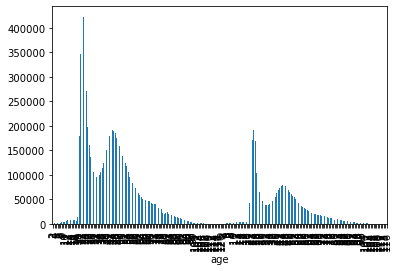

In [14]:
img_name = column_to_analize + '_bar_plot.png'
fig = df_without_nulls.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Stadardization

In [18]:
columns_to_drop = ['canal_entrada','fecha_dato','ncodpers','indresi','indext','ind_empleado','pais_residencia','fecha_alta','indrel','ult_fec_cli_1t','indrel_1mes','conyuemp','indfall','tipodom','nomprov','tiprel_1mes']
df_clean = pd.DataFrame(df_without_nulls.drop(columns=columns_to_drop))

In [19]:
df_clean.shape

(10852934, 32)

In [20]:
df_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,10852898,2,V,5943966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10852934.0,232.0,23.0,422497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_nuevo,10852934.0,NaN,NaN,NaN,0.027092,0.162352,0.0,0.0,0.0,0.0,1.0
antiguedad,10852934.0,506.0,12.0,106876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_prov,10852726.0,NaN,NaN,NaN,26.480537,12.498091,1.0,15.0,28.0,33.0,52.0
ind_actividad_cliente,10852934.0,NaN,NaN,NaN,0.469303,0.499057,0.0,0.0,0.0,1.0,1.0
renta,10852934.0,NaN,NaN,NaN,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51
segmento,10796101,3,02 - PARTICULARES,6522878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_ahor_fin_ult1,10852934.0,NaN,NaN,NaN,0.000115,0.010727,0.0,0.0,0.0,0.0,1.0
ind_aval_fin_ult1,10852934.0,NaN,NaN,NaN,0.000027,0.005205,0.0,0.0,0.0,0.0,1.0


Change char and string values to binary or number values

In [22]:
df_clean['sexo'] = df_clean['sexo'].map({'H': 1, 'V': 0}) 
df_clean['segmento'] = df_clean['segmento'].map({'01 - TOP': 1, '02 - PARTICULARES': 2, '03 - UNIVERSITARIO':3}) 


In [23]:
df_clean = df_clean.reset_index()


In [28]:
df_clean.shape

(10852934, 33)

In [27]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\utils\extmath.py:980: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\utils\extmath.py:1005: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [33]:
outputs = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

y = df_clean[outputs]
x = df_clean.drop(columns=outputs)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [53]:
y_train_unidemesional = y_train.apply(lambda x: x.argmax(), axis=1).values


In [55]:
print(X_train.shape)
print(y_train.shape)
print(y_train_unidemesional.size)

(7271465, 9)
(7271465, 24)
7271465


In [56]:
clf = HistGradientBoostingClassifier().fit(X_train, y_train_unidemesional)


In [57]:
clf.score(X_train, y_train_unidemesional)


0.7242338373353925

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)
